<a href="https://colab.research.google.com/github/as02101099/DeepLearning2022Late/blob/main/CNN%2BTrain_example2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN(畳み込みを含むニューラルネットワーク)でモデルに学習させる（ ＝ 訓練）

## 学習モデルのライブラリをimport

In [1]:
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

## keras自身もimport

In [2]:
import keras

## SVG画像表示用のライブラリをimport

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot 

## その他のライブラリをimport

In [4]:
# 乱数を作るためにNumpyをimport
import numpy as np # importして、npという別名を設定
# 早期終了(Earl Stopping)のためのライブラリをimport
import keras.callbacks as callbacks # callbacksという別名を設定

## Numpyで乱数を作り、ダミーデータとして学習用、検証用にする

In [5]:
# 学習用データを x_train として作る
x_train = np.random.random(( 100, 6, 6, 1) )
# 学習用データの正解を y_train として作る
y_train = keras.utils.to_categorical( np.random.randint( 10,size=(100,1)) ,
                                     num_classes=10 )

In [6]:
# テスト検証用データを x_test として作る
# (6,6,1)の形を今度は20セット分
x_test = np.random.random( ( 20, 6, 6, 1 ) ) 
# テスト検証用データの正解を y_test として作る
y_test = keras.utils.to_categorical( np.random.randint( 10, size=(20,1)), 
                                    num_classes=10
                                     )

## 学習モデルを生成する

In [7]:
model = Sequential( )

## 学習モデルにニューロンの層を追加してニューラルネットワークにする

### 畳み込み層を追加

In [8]:
model.add( Conv2D(  filters=3, # フィルター3パターン
    kernel_size=(3,3), # 受容野のサイズ縦3, 横3
    kernel_initializer='lecun_uniform',
    input_shape=( 6,6,1 ), # 入力データの形縦6, 横6
    name='Conv2D_1'
  )  )

## そのほかの層も追加する

In [9]:
# 全結合層
model.add(  Flatten( name='Flatten_1' )  )
# softmaxで分類するニューロン層
model.add( Dense( units=10, activation='softmax', name='Dense_1'   ) )

### 組み立てた学習モデルの構成を、SVG画像として表示

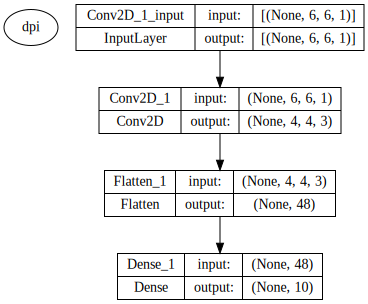

In [10]:
SVG(  model_to_dot( model,
                    show_shapes=True, dpi=None
                    ).create( prog='dot', format='svg' )  )

## 組み立てたモデルを学習データで訓練する
### 早期終了も設定する

In [11]:
# 早期終了用の設定のオブジェクトを用意する
earlyStopping = callbacks.EarlyStopping( monitor='val_loss',# 損失を監視
                                    patience=5 ) # epoch5つ分様子を見る

### 学習方法を指定して学習モデルをコンパイルする

In [12]:
model.compile( loss='mean_squared_error', #損失を 平均(mean)二乗(Suqared)誤差(Error)で計算
              optimizer='sgd' # パラメータの重みをSGDで最適化する
              # SGD = 確率的勾配降下法
              )

### 学習方法を指定した学習モデルを訓練する

In [13]:
model.fit( x_train, y_train, # 学習データと答えデータ
    batch_size=32, # 32個ずつまとめて学習(=バッチ学習)してから重みを調整する
    epochs=10, # バッチが終わったら重みを調整して学習しなおす、その回数
    callbacks=[ earlyStopping ], # エポックの中で呼ぶcallback処理のリストに早期終了を追加
    validation_split=0.2 # 学習データのうち2割を、学習中の自己評価検証に使う
 )

Epoch 1/10
3/3 [==============================] - 1s 116ms/step - loss: 0.0936 - val_loss: 0.0911
Epoch 2/10
3/3 [==============================] - 0s 11ms/step - loss: 0.0936 - val_loss: 0.0910
Epoch 3/10
3/3 [==============================] - 0s 12ms/step - loss: 0.0936 - val_loss: 0.0910
Epoch 4/10
3/3 [==============================] - 0s 12ms/step - loss: 0.0936 - val_loss: 0.0910
Epoch 5/10
3/3 [==============================] - 0s 12ms/step - loss: 0.0936 - val_loss: 0.0910
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0936 - val_loss: 0.0910
Epoch 7/10
3/3 [==============================] - 0s 13ms/step - loss: 0.0936 - val_loss: 0.0910
Epoch 8/10
3/3 [==============================] - 0s 14ms/step - loss: 0.0936 - val_loss: 0.0910
Epoch 9/10
3/3 [==============================] - 0s 13ms/step - loss: 0.0936 - val_loss: 0.0910
Epoch 10/10
3/3 [==============================] - 0s 13ms/step - loss: 0.0936 - val_loss: 0.0910


In [14]:
print("complety executed")

complety executed
